In [55]:
import pandas as pd
df = pd.read_csv('clean_data.csv')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(141708061793.55753, 0.6415318823957563)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame and 'Price' is the target variable

# Prepare the data
X = df.drop('Price', axis=1)
y = df['Price']

# First split to separate out the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Second split to separate out the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=42)  # 0.176 ≈ 15/85

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Evaluate the final model on the test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Validation MSE:", mse_val)
print("Validation R-squared:", r2_val)
print("Test MSE:", mse_test)
print("Test R-squared:", r2_test)


Validation MSE: 3.404889391612939e+29
Validation R-squared: -9.311329107321174e+17
Test MSE: 142843082122.17017
Test R-squared: 0.6437748345115316


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(146026509685.02258, 0.6306078328601649)

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Assuming df is your DataFrame and 'Price' is the target variable

# Prepare the data
X = df.drop('Price', axis=1)
y = df['Price']

# Define the model
model = KNeighborsRegressor(n_neighbors=3)

# Configure the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Evaluate the model using cross-validation
mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

# Calculate the average scores
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

print("Average Mean Squared Error:", mean_mse)
print("Average R-squared:", mean_r2)


Average Mean Squared Error: 130045405348.80598
Average R-squared: 0.6491076725562362


In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming df is your DataFrame and 'Price' is the target variable

# Prepare the data
X = df.drop('Price', axis=1)
y = df['Price']

# Define the model
model = LinearRegression()

# Configure the cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Evaluate the model using cross-validation
mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

# Calculate the average scores
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

print("Average Mean Squared Error:", mean_mse)
print("Average R-squared:", mean_r2)


Average Mean Squared Error: 6.359694827747732e+27
Average R-squared: -1.7935132484103066e+16


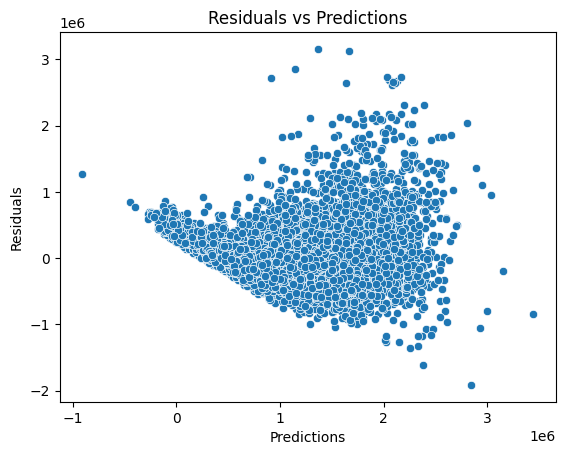

In [60]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(df.drop('Price', axis=1), df['Price'])
predictions = model.predict(df.drop('Price', axis=1))
residuals = df['Price'] - predictions

sns.scatterplot(x=predictions, y=residuals)
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()


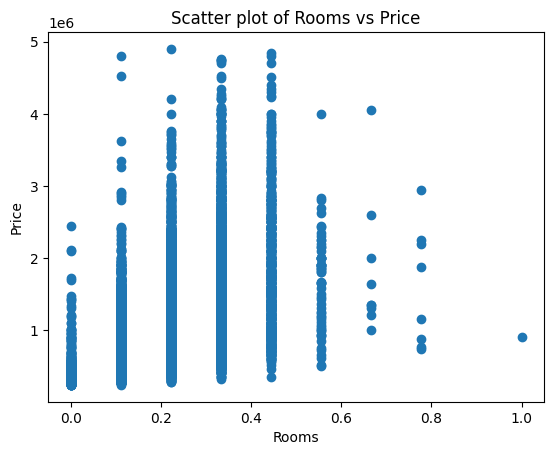

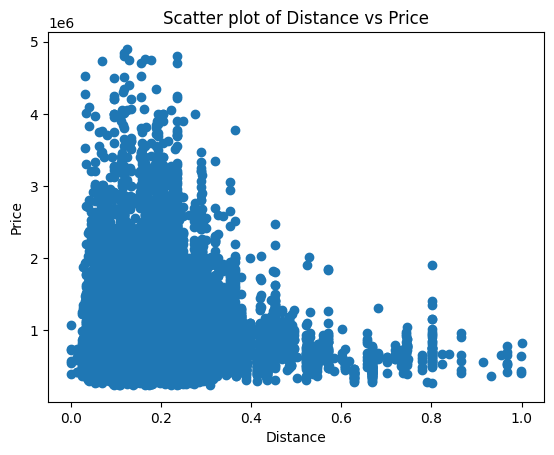

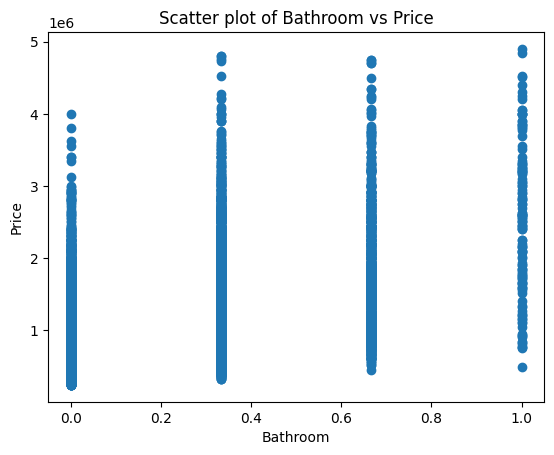

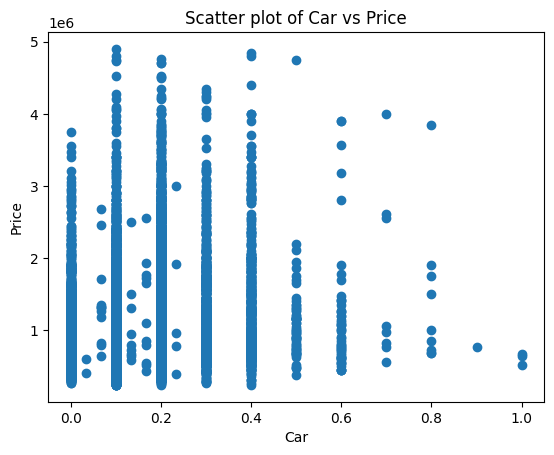

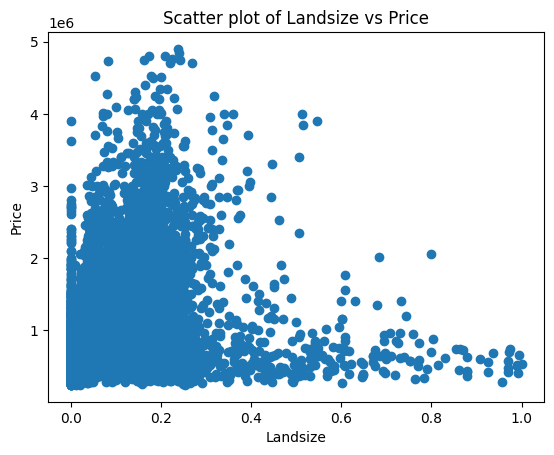

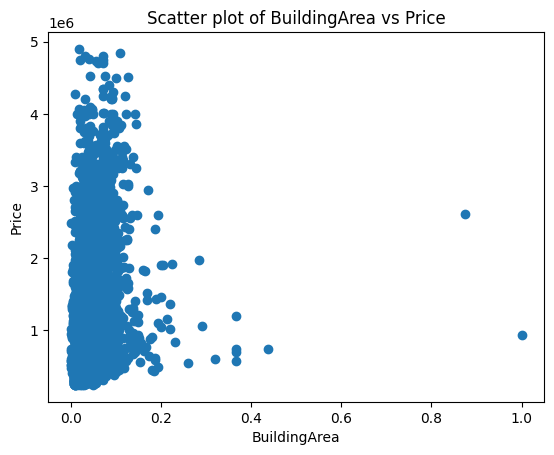

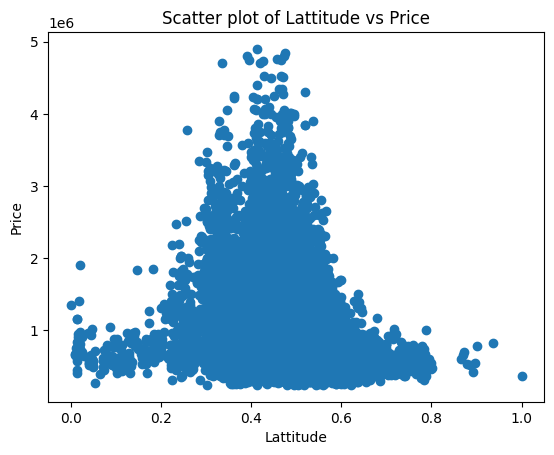

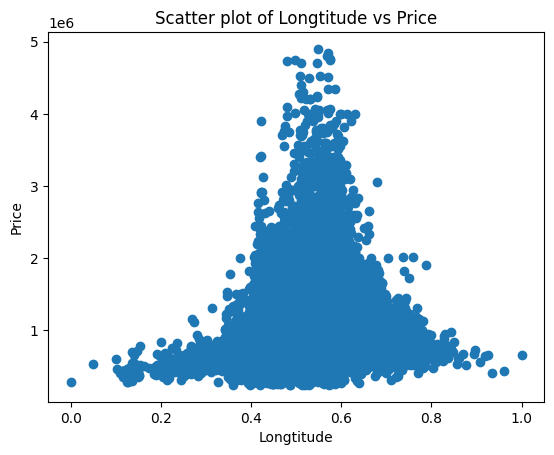

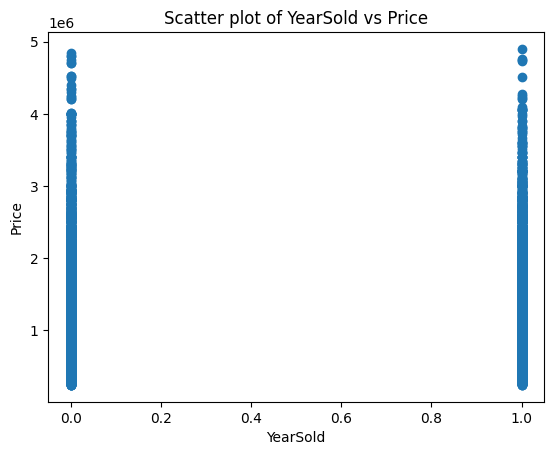

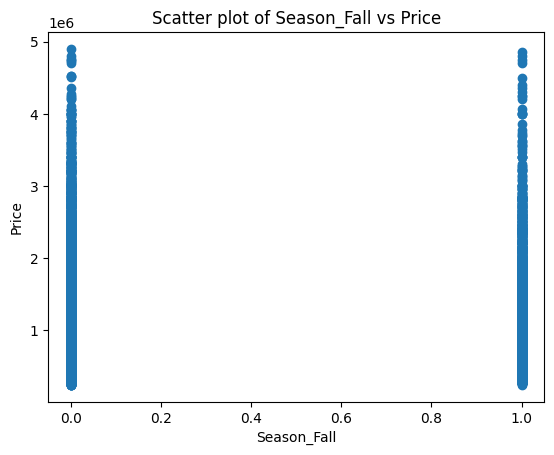

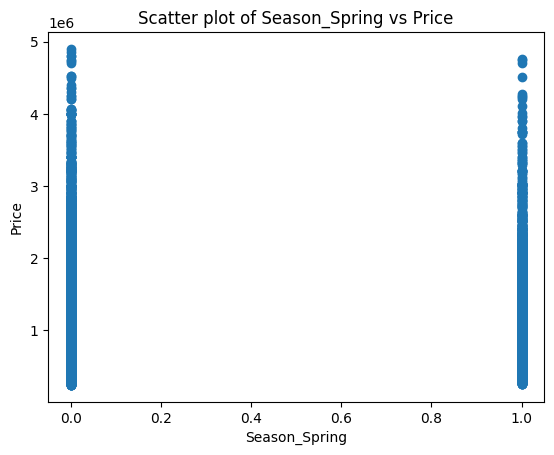

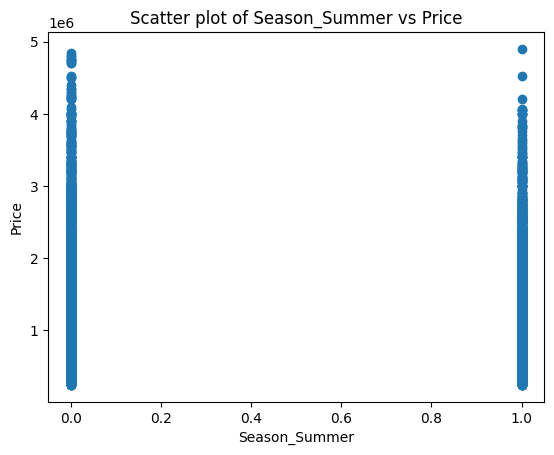

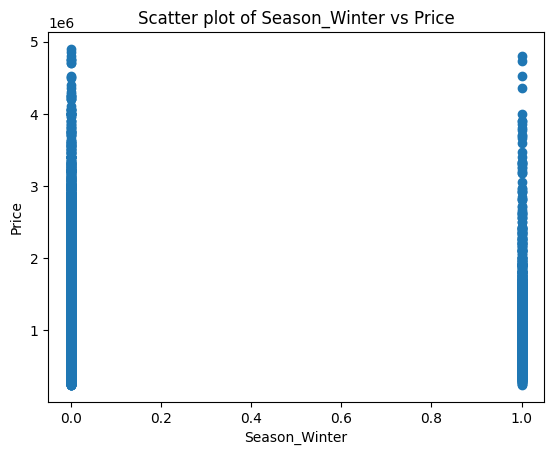

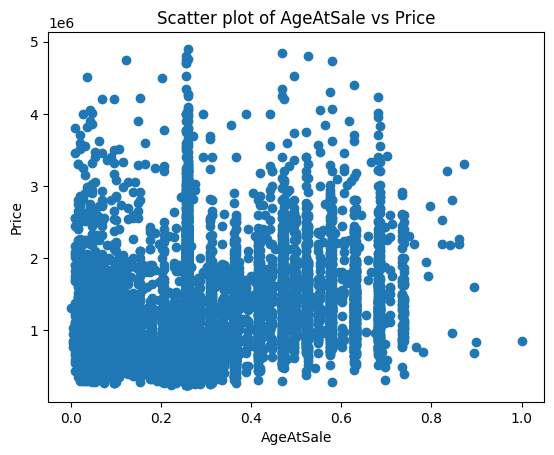

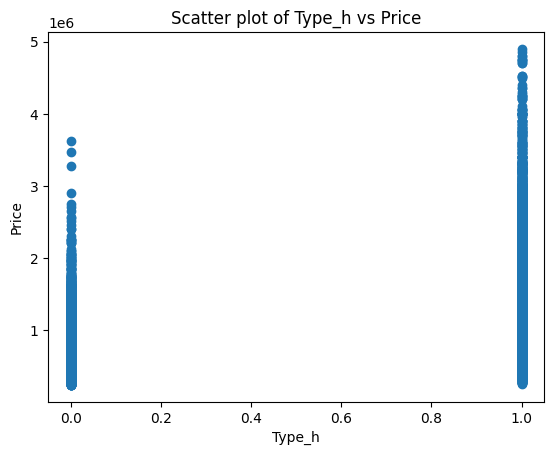

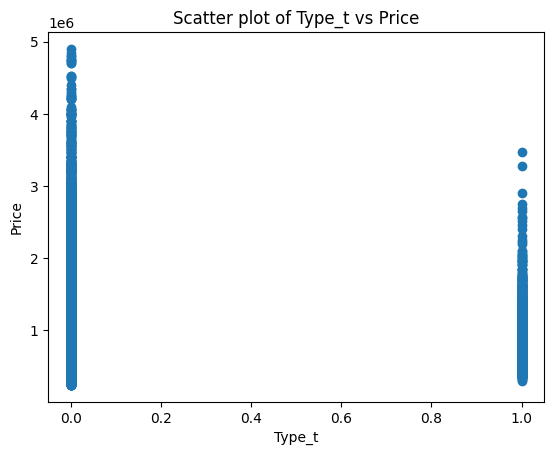

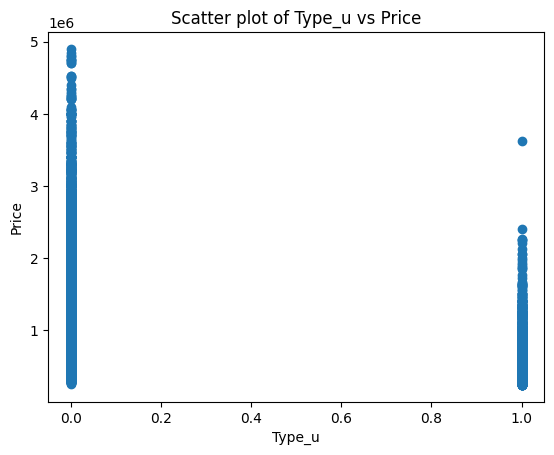

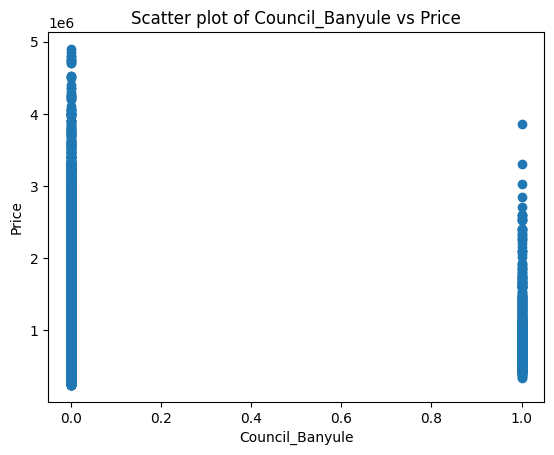

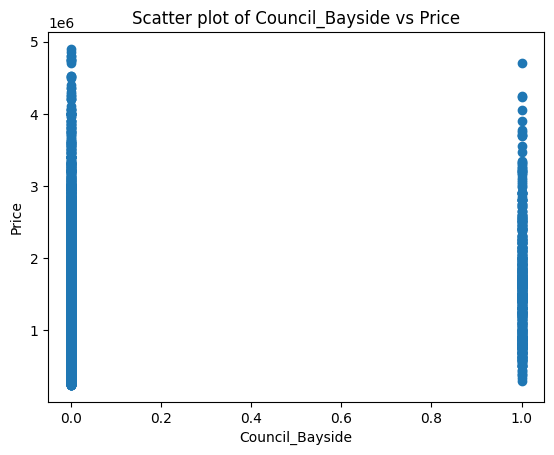

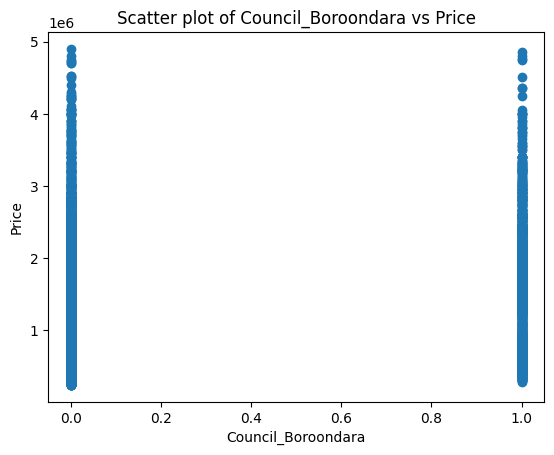

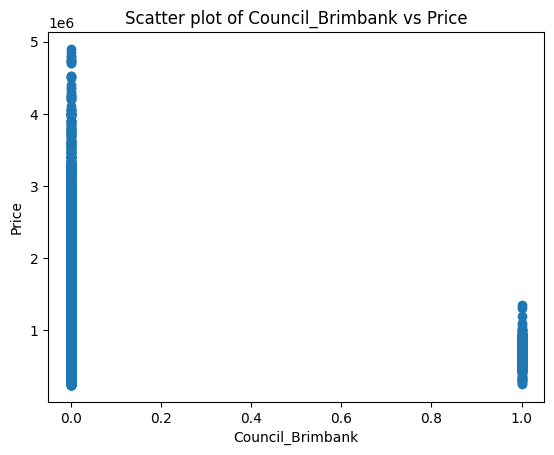

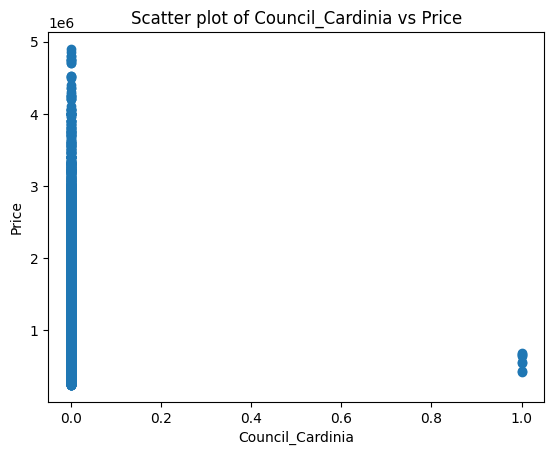

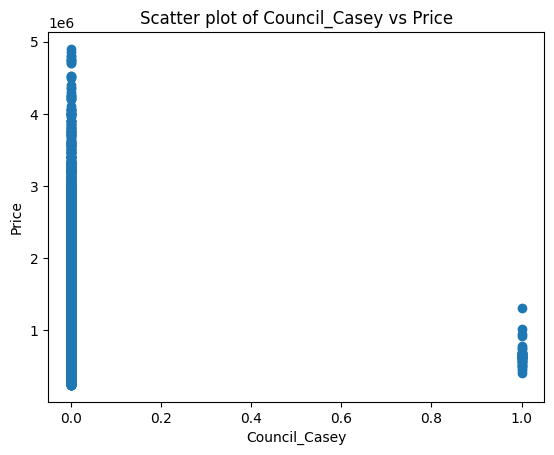

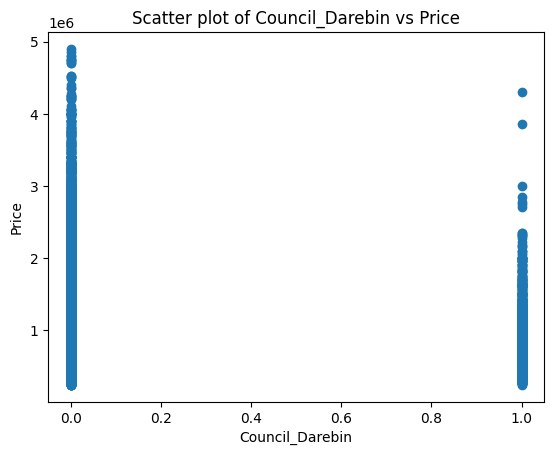

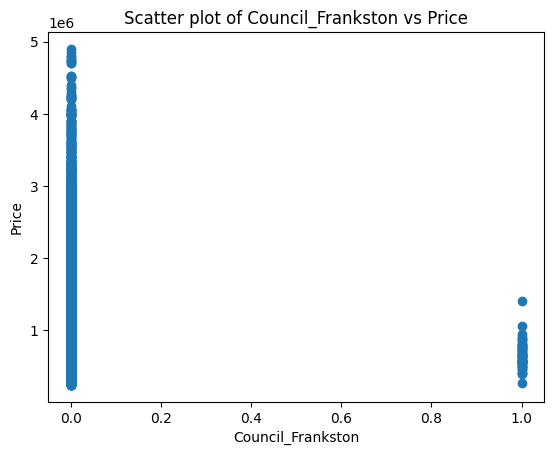

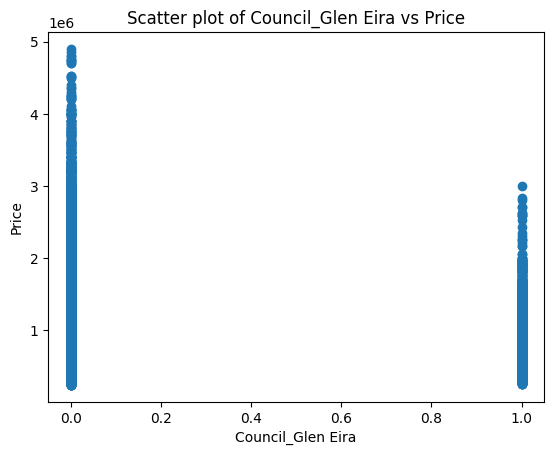

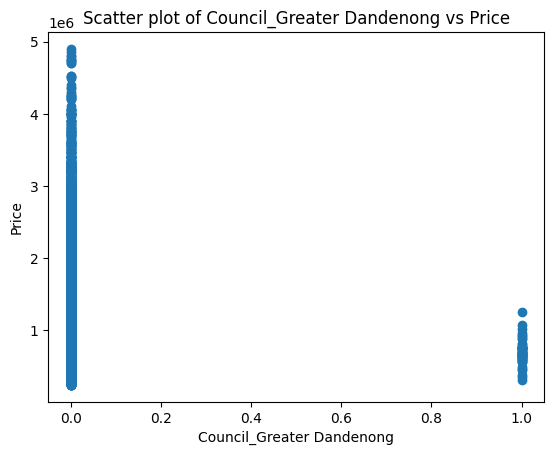

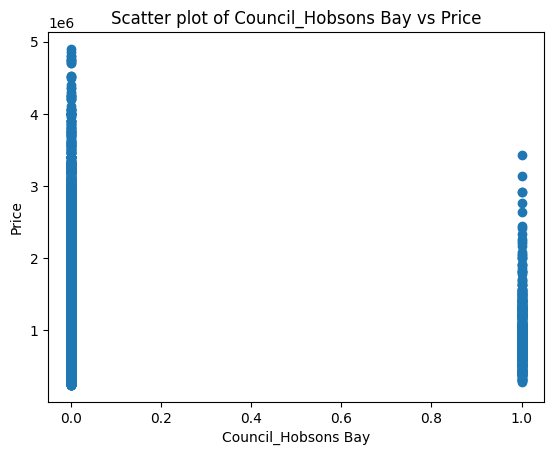

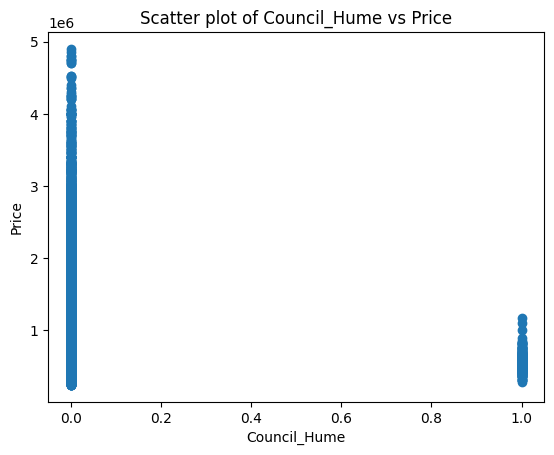

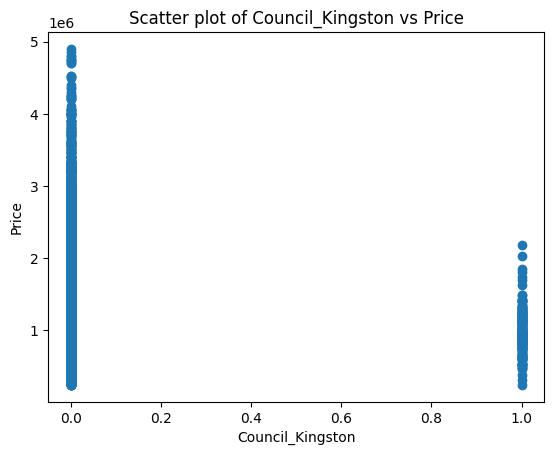

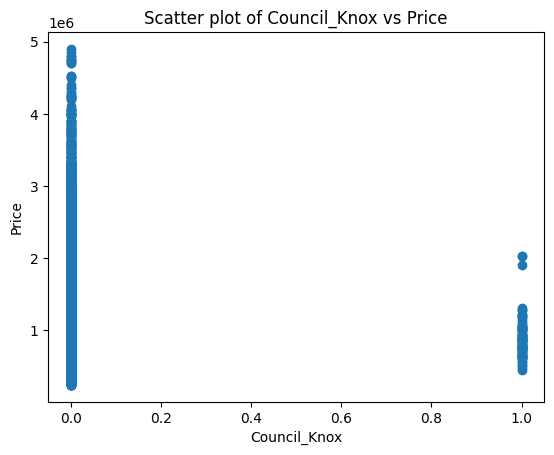

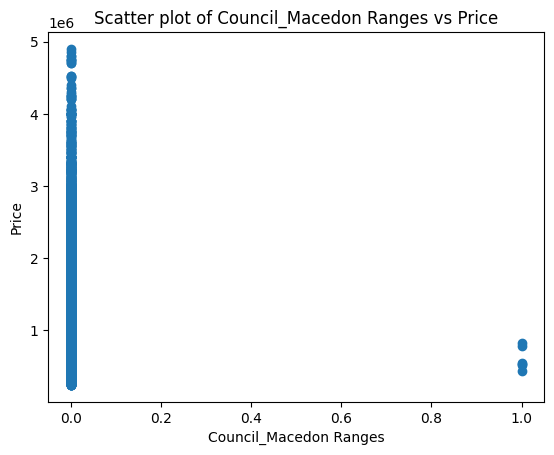

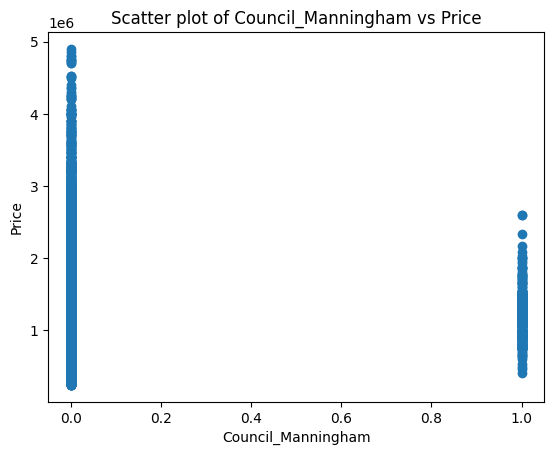

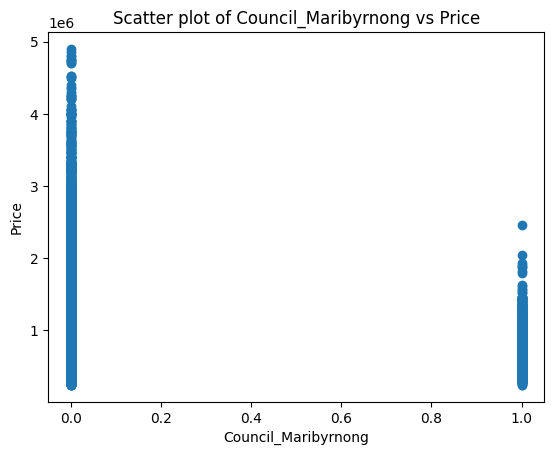

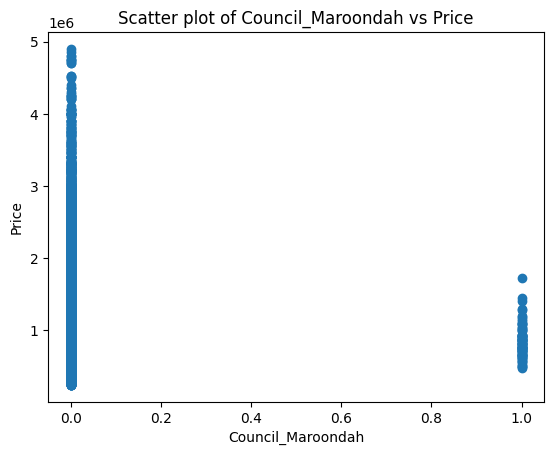

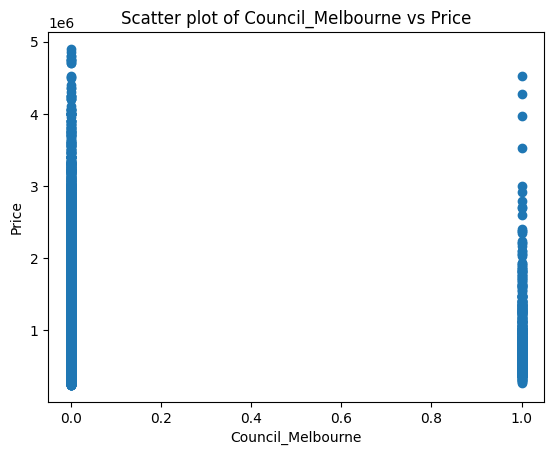

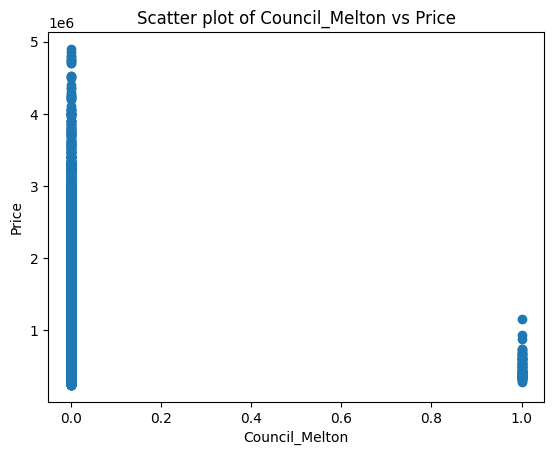

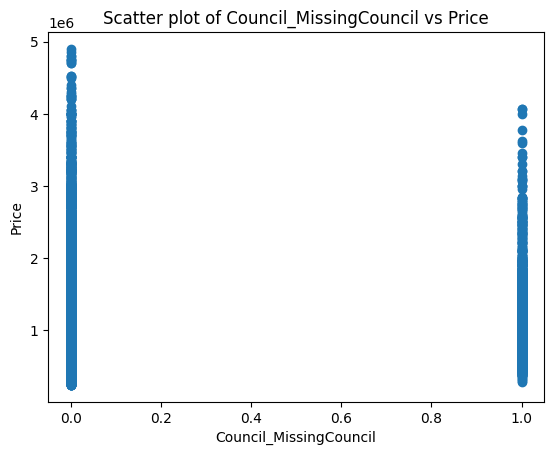

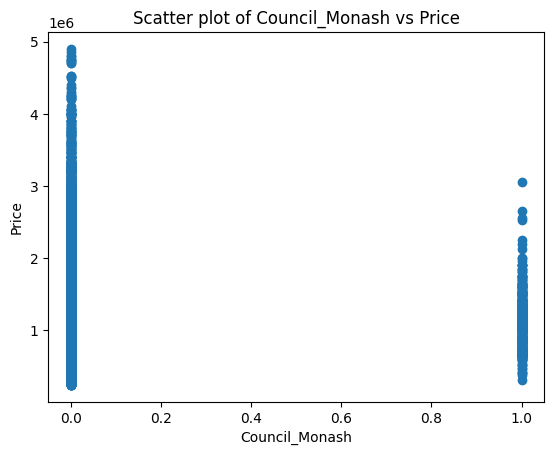

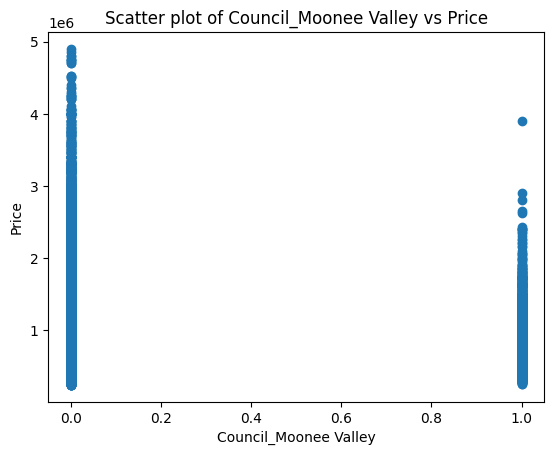

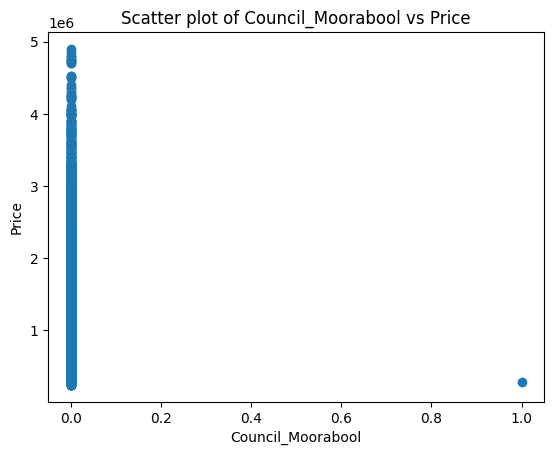

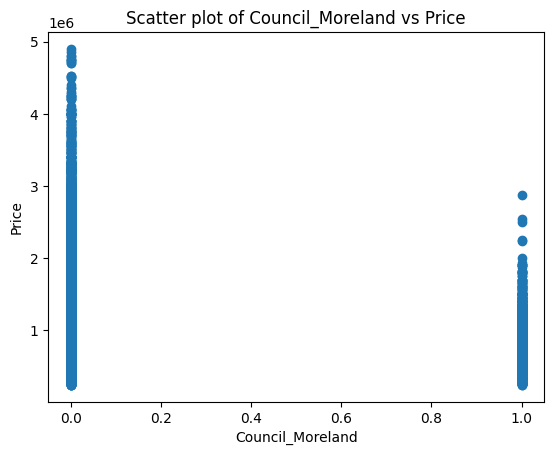

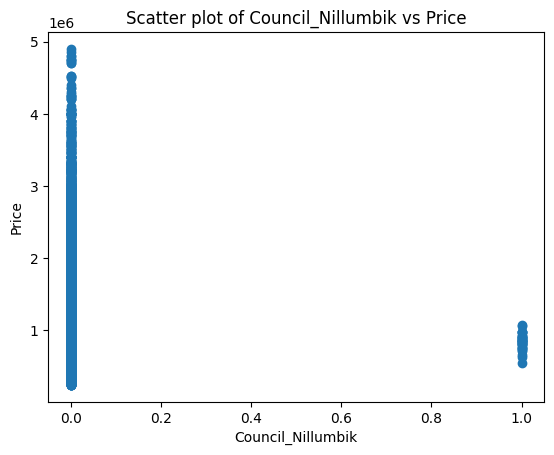

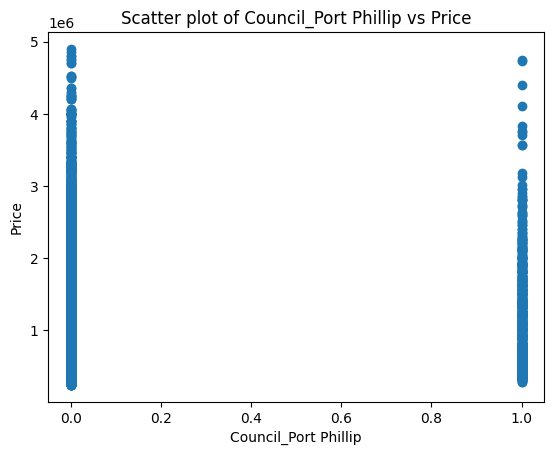

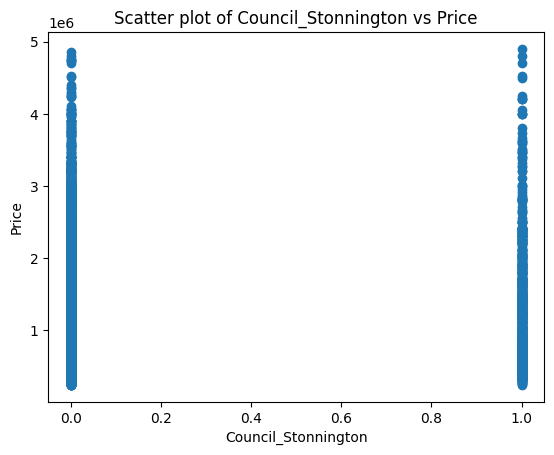

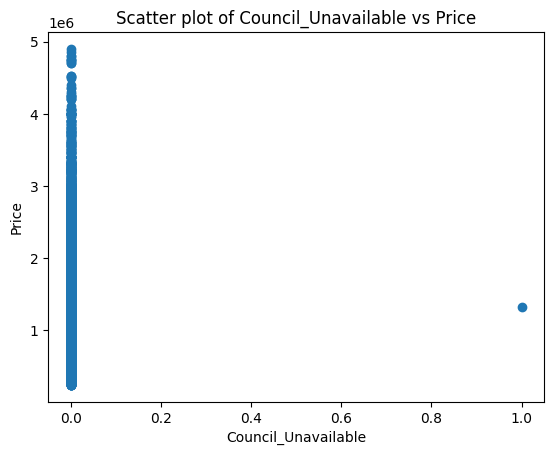

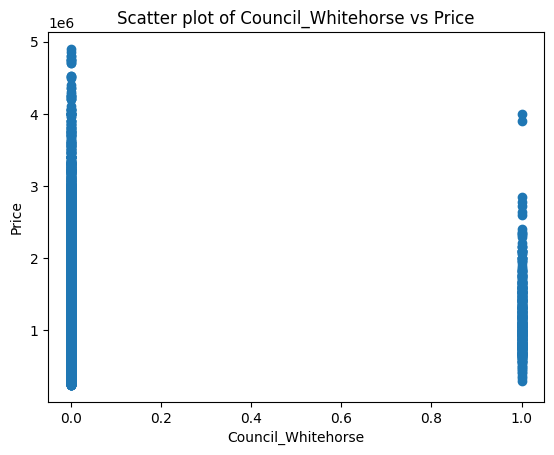

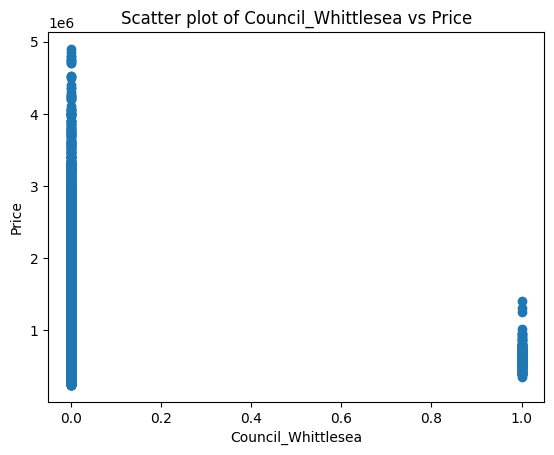

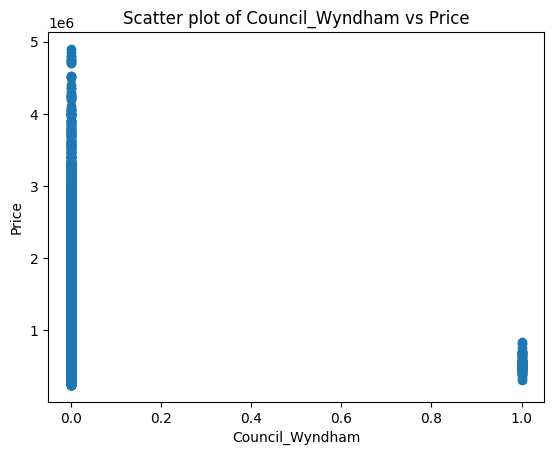

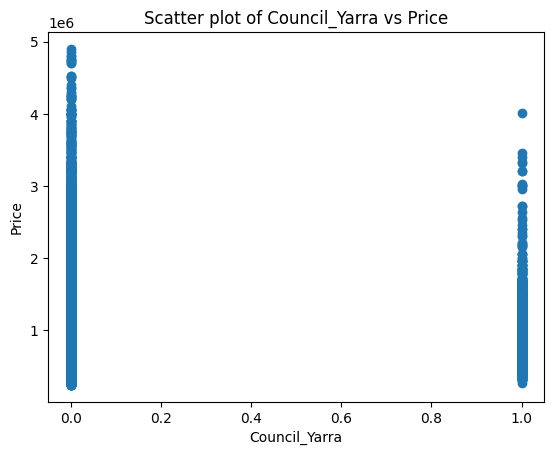

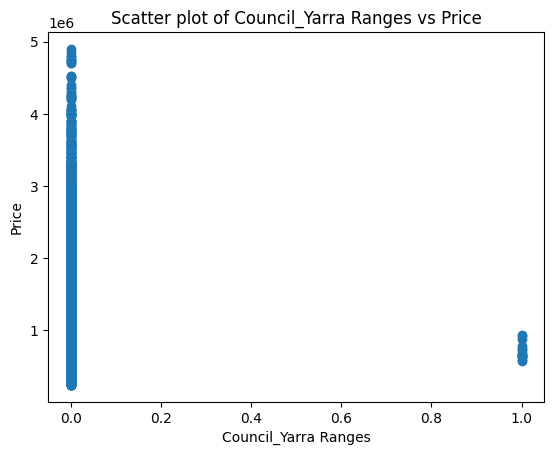

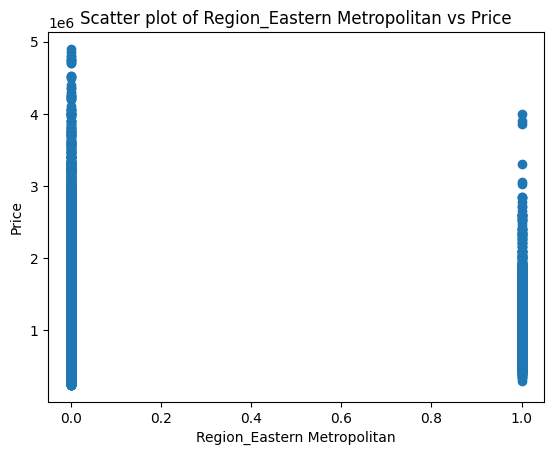

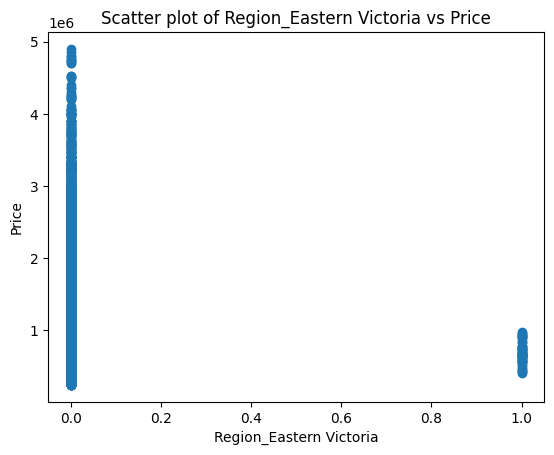

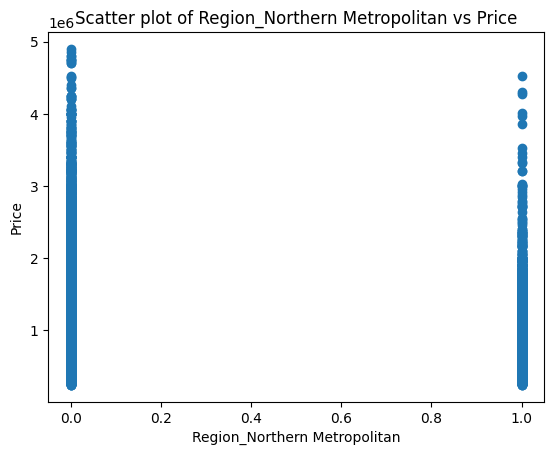

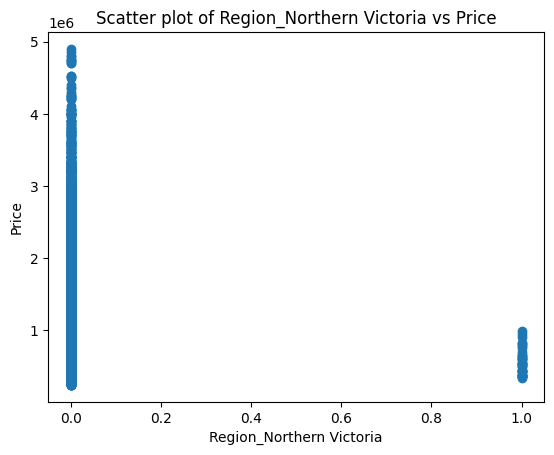

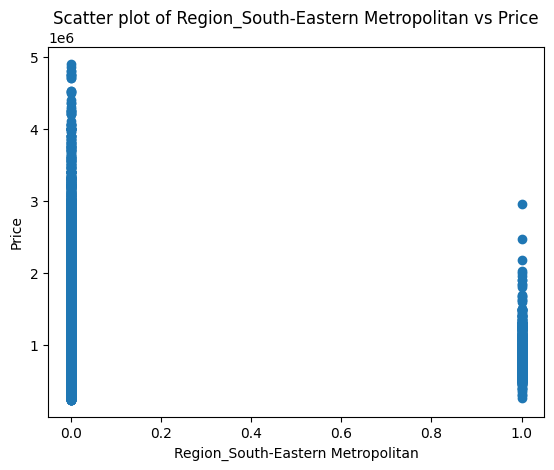

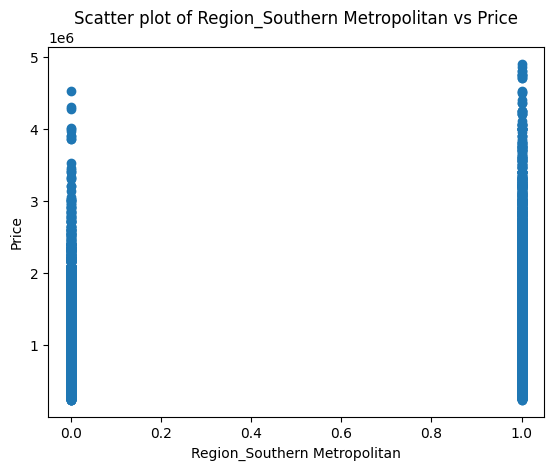

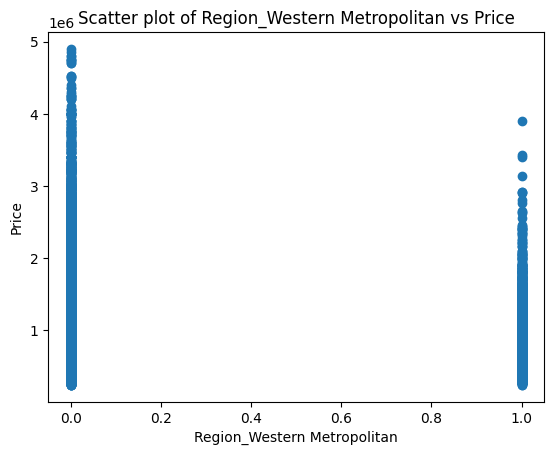

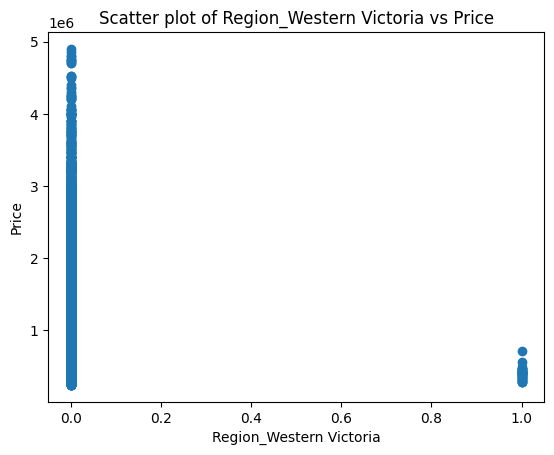

In [8]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is your target variable
for column in df.columns:
    if column != 'Price':
        plt.scatter(df[column], df['Price'])
        plt.title(f'Scatter plot of {column} vs Price')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()
